# Online Payment Fraud Detection

Data Source: /https://www.kaggle.com/datasets/jainilcoder/online-payment-fraud-detection/data

### Importing Packages

In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import warnings
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score,roc_auc_score
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score


### Ignores all warning messages

In [2]:
warnings.filterwarnings("ignore")

### Reading the csv file

In [3]:
df = pd.read_csv("onlinefraud.csv")
# Displaying top 5 rows
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
# Dispalying rows and columns
df.shape

(6362620, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [7]:
df.head().T

,0,1,2,3,4
step,1,1,1,1,1
type,PAYMENT,PAYMENT,TRANSFER,CASH_OUT,PAYMENT
amount,9839.64,1864.28,181.0,181.0,11668.14
nameOrig,C1231006815,C1666544295,C1305486145,C840083671,C2048537720
oldbalanceOrg,170136.0,21249.0,181.0,181.0,41554.0
newbalanceOrig,160296.36,19384.72,0.0,0.0,29885.86
nameDest,M1979787155,M2044282225,C553264065,C38997010,M1230701703
oldbalanceDest,0.0,0.0,0.0,21182.0,0.0
newbalanceDest,0.0,0.0,0.0,0.0,0.0
isFraud,0,0,1,1,0


## Data Cleaning

In [8]:
# Displaying datatypes
df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [9]:
# Converting datatypes from objects
df = df.convert_dtypes()
df.dtypes

step                       Int64
type              string[python]
amount                   Float64
nameOrig          string[python]
oldbalanceOrg            Float64
newbalanceOrig           Float64
nameDest          string[python]
oldbalanceDest           Float64
newbalanceDest           Float64
isFraud                    Int64
isFlaggedFraud             Int64
dtype: object

#### Analysing missing values

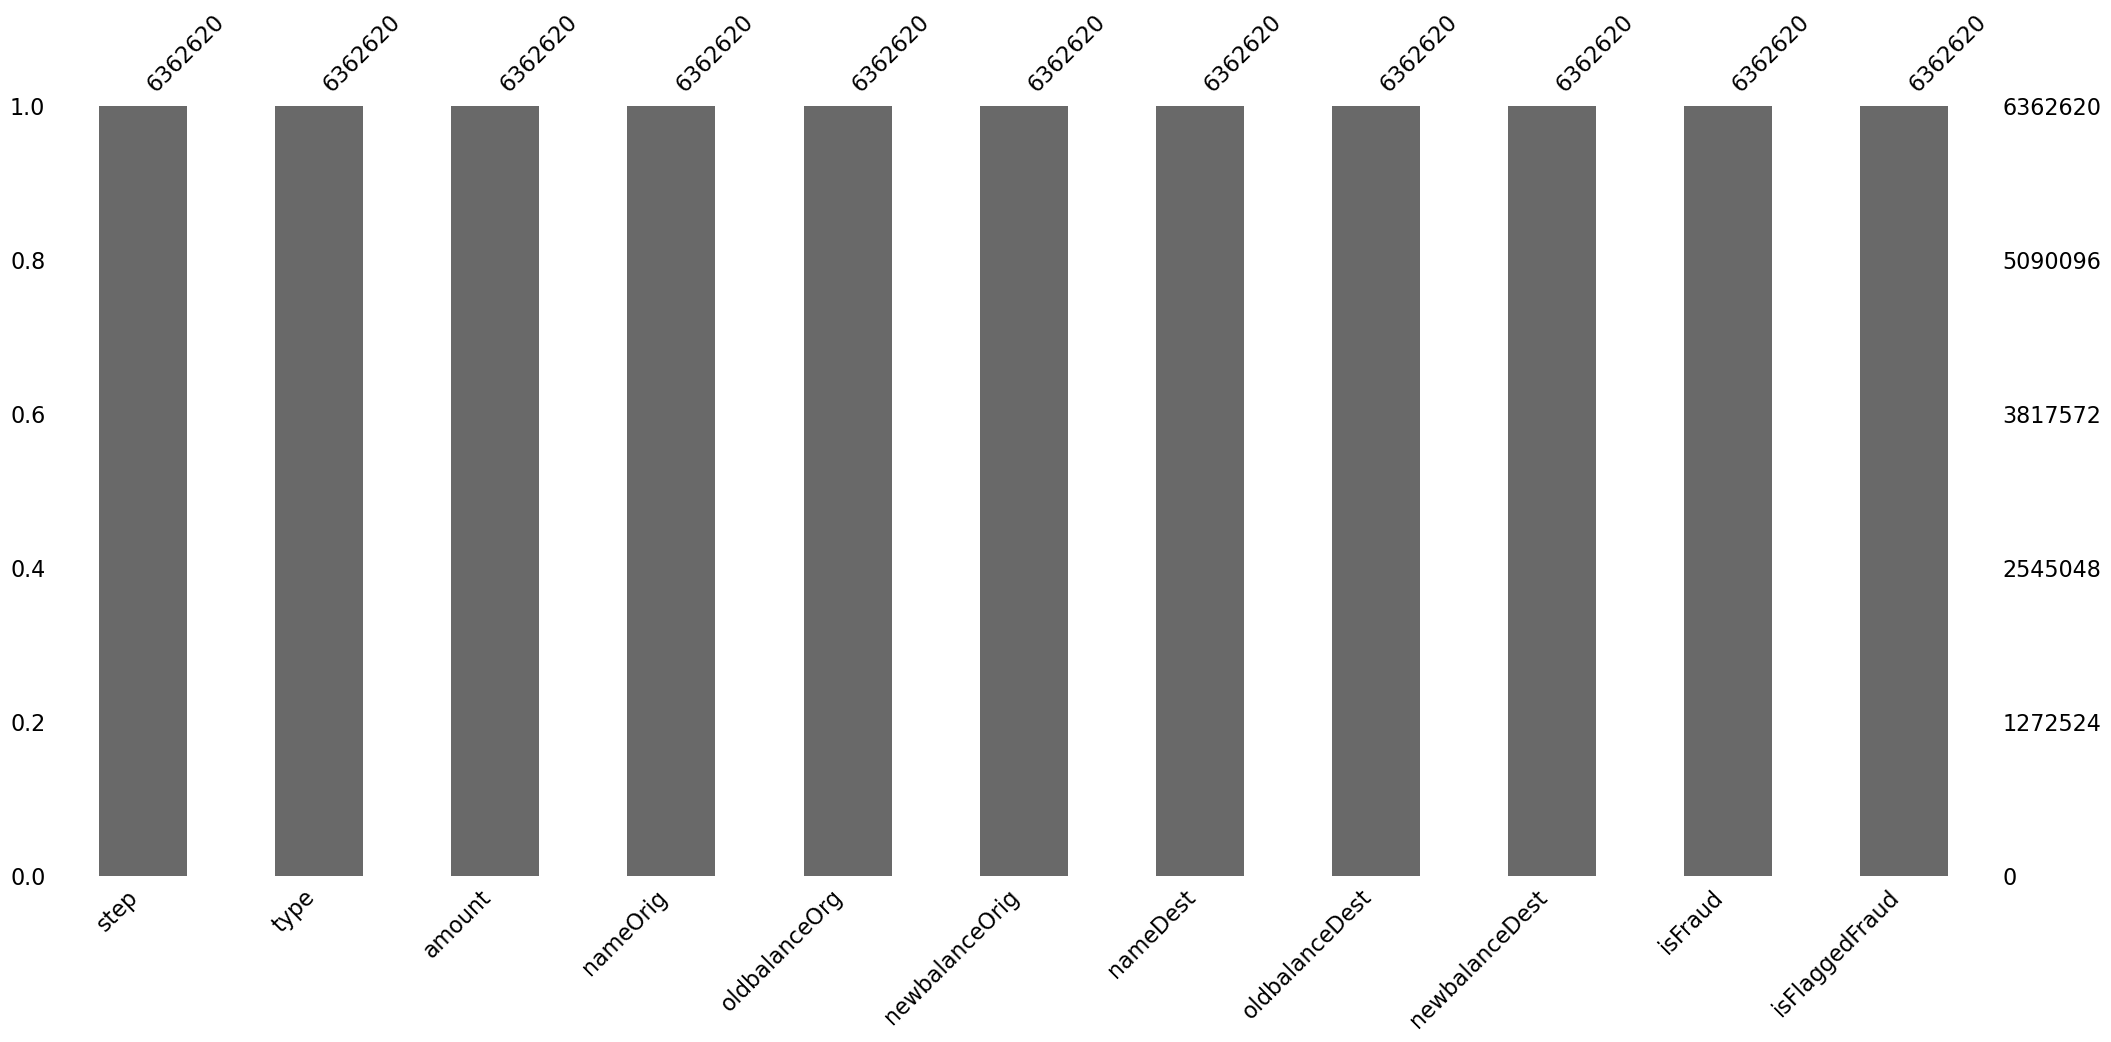

In [10]:
# Displaying missing values
msno.bar(df)
plt.show()

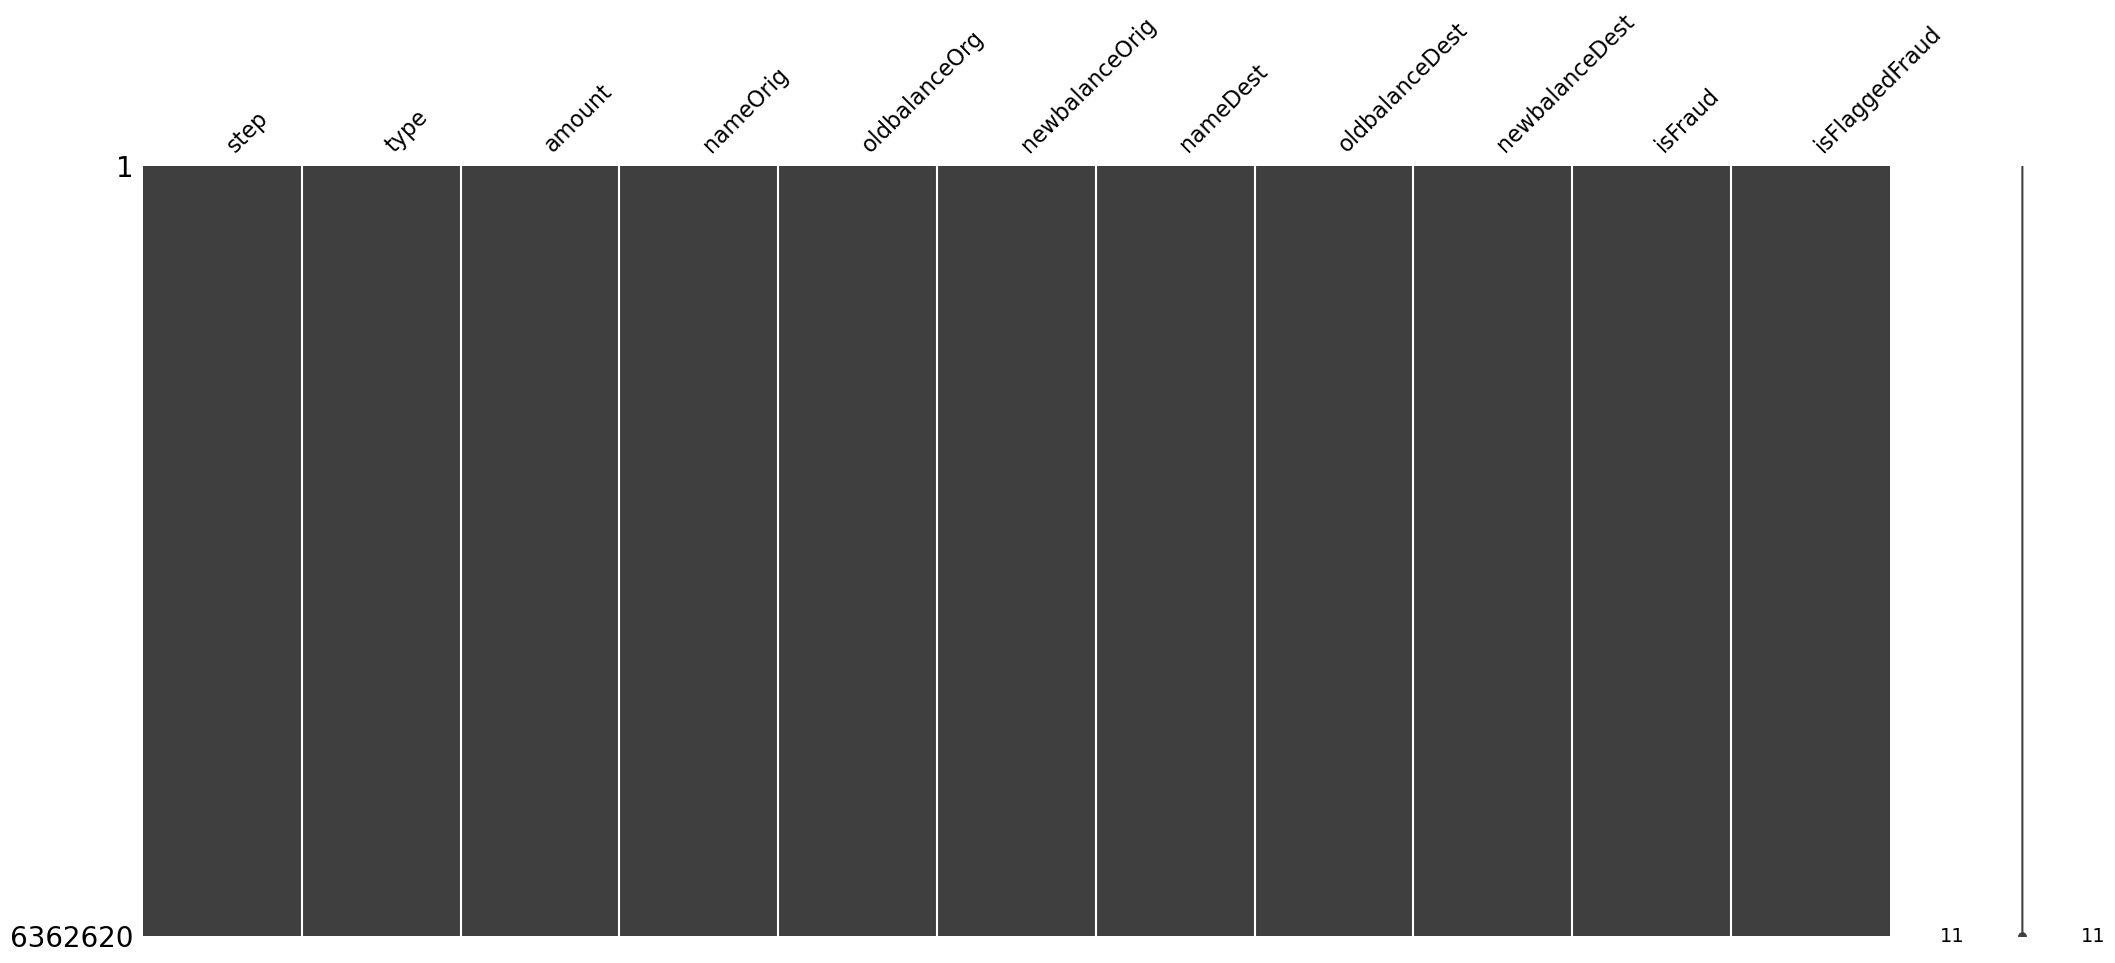

In [11]:
# Displaying missing values
msno.matrix(df)
plt.show()

In [12]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

### Checking for outliers

<Axes: >

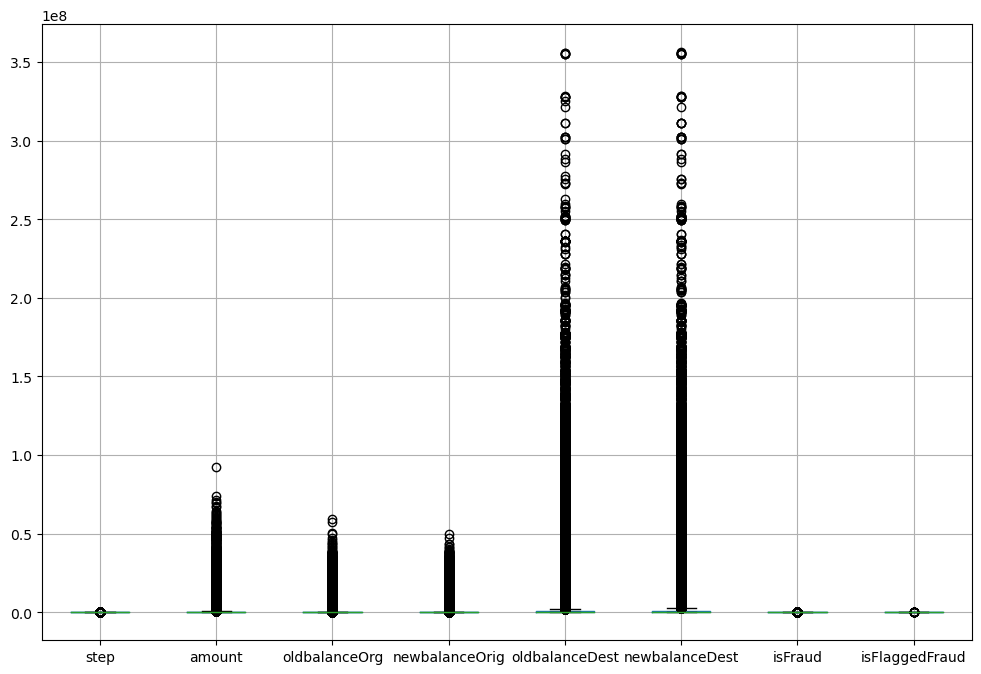

In [13]:
plt.figure(figsize=(12,8))
df.boxplot()

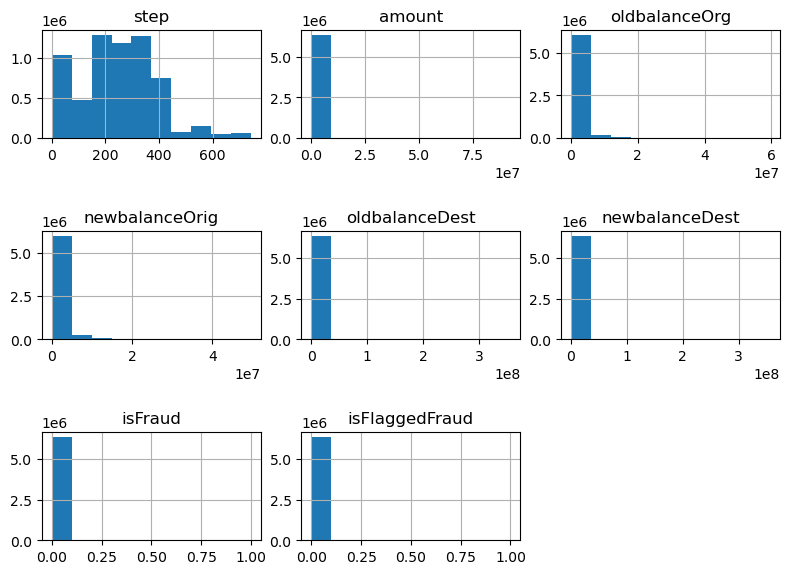

In [14]:
ig, ax = plt.subplots(1, 1, figsize=(8, 6))
df.hist(ax=ax)
plt.tight_layout()
plt.show()

## Balancing the data

In [15]:
df['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: Int64

### To tackle the issue of imbalanced datasets, you've implemented two key resampling strategies: SMOTE and undersampling. Initially, I have compare these methods by training baseline models on each and evaluating them with detailed metrics like precision, recall, F1-score, and AUC-ROC, using cross-validation to check for consistency. This process helps determine which resampling technique best suits your data

### OverSampling: SMOTE

In [16]:
X = df.drop(columns=['isFraud','type','nameDest','nameOrig'], axis=1)# Remove the class column from the main dataset
print(X)

         step      amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0           1     9839.64       170136.0       160296.36             0.0   
1           1     1864.28        21249.0        19384.72             0.0   
2           1       181.0          181.0             0.0             0.0   
3           1       181.0          181.0             0.0         21182.0   
4           1    11668.14        41554.0        29885.86             0.0   
...       ...         ...            ...             ...             ...   
6362615   743   339682.13      339682.13             0.0             0.0   
6362616   743  6311409.28     6311409.28             0.0             0.0   
6362617   743  6311409.28     6311409.28             0.0        68488.84   
6362618   743   850002.52      850002.52             0.0             0.0   
6362619   743   850002.52      850002.52             0.0      6510099.11   

         newbalanceDest  isFlaggedFraud  
0                   0.0               0  
1  

In [17]:
Y = df['isFraud']
print(Y)

0          0
1          0
2          1
3          1
4          0
          ..
6362615    1
6362616    1
6362617    1
6362618    1
6362619    1
Name: isFraud, Length: 6362620, dtype: Int64


In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [19]:
print(X.shape, X_train.shape, X_test.shape)

(6362620, 7) (5090096, 7) (1272524, 7)


In [20]:
from imblearn.over_sampling import SMOTE #SMOTE = synthetic minority oversampling technique
smote = SMOTE()

In [21]:
X_train = X_train.astype(float)

In [22]:
X_train_smote, Y_train_smote = smote.fit_resample(X_train, Y_train)
print(X_train_smote.shape)
print(Y_train_smote.shape)

(10167052, 7)
(10167052,)


### UnderSampling: Random UnderSampling

In [23]:
legit_txns = df[df.isFraud == 0]
fraud_txns = df[df.isFraud == 1]

In [24]:
print(legit_txns.shape)
print(fraud_txns.shape)

(6354407, 11)
(8213, 11)


In [25]:
legit_sample = legit_txns.sample(n=8213) # Samples 8213 transactions out of the legit transactions
undersampled_dataset = pd.concat([legit_sample, fraud_txns], axis=0)

In [26]:
undersampled_dataset['isFraud'].value_counts()

isFraud
0    8213
1    8213
Name: count, dtype: Int64

In [27]:
X = undersampled_dataset.drop(columns=['isFraud','type','nameDest','nameOrig'], axis=1) # Remove the class column from the undersampled dataset
print(X)

         step      amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
5205808   370    189809.9            0.0             0.0      2588402.68   
5459974   379   224077.86            0.0             0.0      5453087.62   
3037486   234   163010.41        48991.0             0.0        17355.05   
3251021   251    21503.53       16548.66             0.0             0.0   
4933062   350    36944.75            0.0             0.0       348912.17   
...       ...         ...            ...             ...             ...   
6362615   743   339682.13      339682.13             0.0             0.0   
6362616   743  6311409.28     6311409.28             0.0             0.0   
6362617   743  6311409.28     6311409.28             0.0        68488.84   
6362618   743   850002.52      850002.52             0.0             0.0   
6362619   743   850002.52      850002.52             0.0      6510099.11   

         newbalanceDest  isFlaggedFraud  
5205808      2778212.58               0  
545

In [28]:
Y = undersampled_dataset['isFraud']
print(Y)

5205808    0
5459974    0
3037486    0
3251021    0
4933062    0
          ..
6362615    1
6362616    1
6362617    1
6362618    1
6362619    1
Name: isFraud, Length: 16426, dtype: Int64


In [29]:
X_train_undersampled, X_test_undersampled, Y_train_undersampled, Y_test_undersampled = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [30]:
print(X.shape, X_train_undersampled.shape, X_test_undersampled.shape)

(16426, 7) (13140, 7) (3286, 7)


## Model training

* To enhance model performance and ensure consistent interpretation of features, I have applied scaling to dataset. This preprocessing step normalizes or standardizes the range of feature values, which is crucial for many machine learning algorithms that are sensitive to the magnitude of inputs.

### Scaling for Oversampling

In [31]:
scaler = StandardScaler()
X_train_scaled_smote = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

### Scaling for Undersampling

In [32]:
X_train_scaled_undersampled = scaler.fit_transform(X_train_undersampled)
X_test_scaled_undersampled = scaler.transform(X_test_undersampled)


## Creating the Model instances/objects

* To enhance predictive analysis, I have applied multiple models. Logistic Regression is great for straightforward interpretations, particularly in binary classifications. Decision Trees help visualize decision-making paths and are effective in recognizing complex patterns, though they can overfit if not managed carefully. Random Forest builds on decision trees by using an ensemble approach, which significantly improves prediction stability and accuracy. Lastly, XGBoost stands out for its speed and performance, especially useful for tackling more intricate structured data challenges. Together, these models form a robust toolkit, each contributing its strengths to ensure your predictive modeling is as effective and reliable as possible.

### smote

In [33]:
#pipeline for Linear Regression
lr_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression())
])

lr_pipeline.fit(X_train_scaled_smote, Y_train_smote)
X_train_prediction = lr_pipeline.predict(X_train_scaled_smote)
lr_smote_training_data_accuracy = accuracy_score(X_train_prediction, Y_train_smote)
print('Accuracy on Training data : ', lr_smote_training_data_accuracy)
X_test_predictions = lr_pipeline.predict(X_test_scaled)
lr_smote_testing_accuracy = accuracy_score(X_test_predictions, Y_test)
print('Accuracy on Testing data : ', lr_smote_testing_accuracy)


Accuracy on Training data :  0.9406136606756806
Accuracy on Testing data :  0.9684870383584121


In [34]:
lr_smote_testing_data_classification_report = classification_report(X_test_predictions, Y_test)
print('\nClassification Report on Training data : \n', lr_smote_testing_data_classification_report)


Classification Report on Training data : 
               precision    recall  f1-score   support

         0.0       0.97      1.00      0.98   1231080
         1.0       0.91      0.04      0.07     41444

    accuracy                           0.97   1272524
   macro avg       0.94      0.52      0.53   1272524
weighted avg       0.97      0.97      0.95   1272524



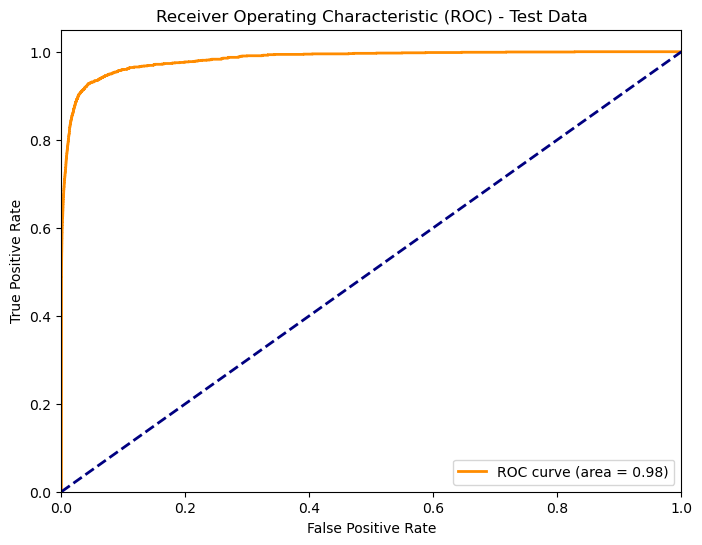

The AUC value for the testing data: 0.983


In [35]:
from sklearn.metrics import roc_curve, auc
Y_test_probabilities = lr_pipeline.predict_proba(X_test_scaled)[:, 1]

# Calculate ROC curve from y_test and the probability predictions
fpr, tpr, _ = roc_curve(Y_test, Y_test_probabilities)

# Calculate AUC (Area under the ROC Curve )
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Random classifier line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Test Data')
plt.legend(loc="lower right")
plt.show()

auc_value_lr = roc_auc_score(Y_test, Y_test_probabilities)

print(f'The AUC value for the testing data: {auc_value_lr:.3f}')


In [36]:
#pipeline for Decision Tree Classifier
dt_pipeline = Pipeline([
    ('classifier', DecisionTreeClassifier())
])

dt_pipeline.fit(X_train_scaled_smote, Y_train_smote)
X_train_prediction = dt_pipeline.predict(X_train_scaled_smote)
dt_smote_training_data_accuracy = accuracy_score(X_train_prediction, Y_train_smote)
print('Accuracy on Training data : ', dt_smote_training_data_accuracy)
X_test_predictions = dt_pipeline.predict(X_test_scaled)
dt_smote_testing_accuracy = accuracy_score(X_test_predictions, Y_test)
print('Accuracy on Testing data : ', dt_smote_testing_accuracy)


Accuracy on Training data :  1.0
Accuracy on Testing data :  0.9991882274911907


In [37]:
from sklearn.model_selection import cross_val_score
# Applying cross-validation to the training set
cv_scores = cross_val_score(dt_pipeline, X_train_scaled_smote, Y_train_smote, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

Cross-validation scores: [0.99941379 0.99942314 0.99942019 0.99941822 0.99942215]
Mean cross-validation score: 0.999419497412039


In [38]:
dt_smote_testing_data_classification_report = classification_report(X_test_predictions, Y_test)
print('\nClassification Report on Training data : \n', dt_smote_testing_data_classification_report)


Classification Report on Training data : 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00   1270078
         1.0       0.93      0.62      0.75      2446

    accuracy                           1.00   1272524
   macro avg       0.96      0.81      0.87   1272524
weighted avg       1.00      1.00      1.00   1272524



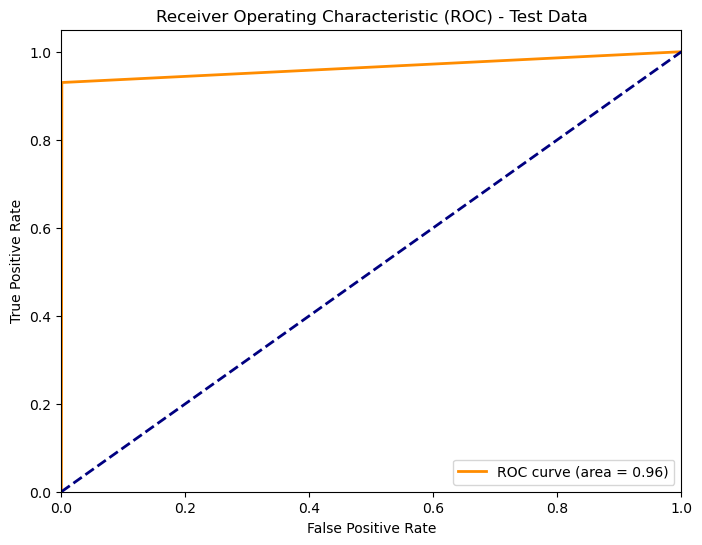

The AUC value for the testing data: 0.965


In [39]:
from sklearn.metrics import roc_curve, auc
Y_test_probabilities = dt_pipeline.predict_proba(X_test_scaled)[:, 1]

# Calculate ROC curve from y_test and the probability predictions
fpr, tpr, _ = roc_curve(Y_test, Y_test_probabilities)

# Calculate AUC (Area under the ROC Curve )
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Random classifier line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Test Data')
plt.legend(loc="lower right")
plt.show()

auc_value_dt = roc_auc_score(Y_test, Y_test_probabilities)

print(f'The AUC value for the testing data: {auc_value_dt:.3f}')


In [40]:
#pipeline for Random Forest Classifier
rf_pipeline = Pipeline([
    ('classifier', RandomForestClassifier())
])

rf_pipeline.fit(X_train_scaled_smote, Y_train_smote)
X_train_prediction = rf_pipeline.predict(X_train_scaled_smote)
rf_smote_training_data_accuracy = accuracy_score(X_train_prediction, Y_train_smote)
print('Accuracy on Training data : ', rf_smote_training_data_accuracy)
X_test_predictions = rf_pipeline.predict(X_test_scaled)
rf_smote_testing_accuracy = accuracy_score(X_test_predictions, Y_test)
print('Accuracy on Testing data : ', rf_smote_testing_accuracy)


Accuracy on Training data :  0.9999994098584329
Accuracy on Testing data :  0.9990349887310573


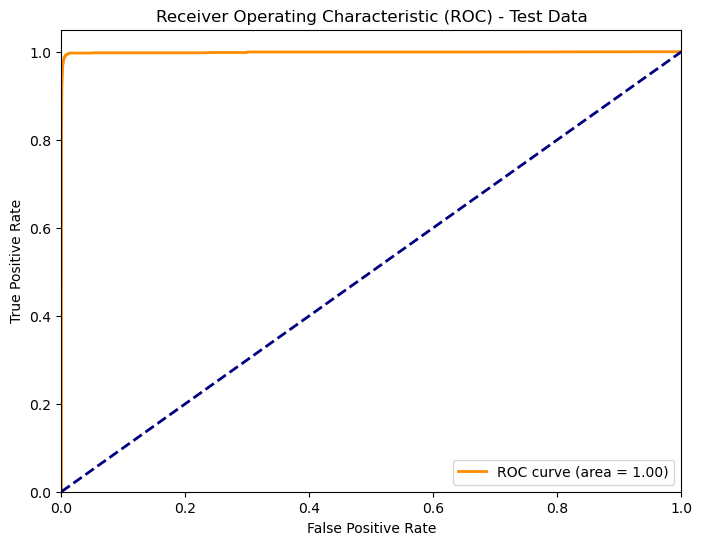

The AUC value for the testing data: 0.999


In [43]:
from sklearn.metrics import roc_curve, auc
Y_test_probabilities = rf_pipeline.predict_proba(X_test_scaled)[:, 1]

# Calculate ROC curve from y_test and the probability predictions
fpr, tpr, _ = roc_curve(Y_test, Y_test_probabilities)

# Calculate AUC (Area under the ROC Curve )
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Random classifier line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Test Data')
plt.legend(loc="lower right")
plt.show()

auc_value_rf = roc_auc_score(Y_test, Y_test_probabilities)

print(f'The AUC value for the testing data: {auc_value_rf:.3f}')


In [44]:
#pipeline for XGBoost
xgb_pipeline = Pipeline([
    ('classifier', xgb.XGBClassifier())
])

xgb_pipeline.fit(X_train_scaled_smote, Y_train_smote)
X_train_prediction = xgb_pipeline.predict(X_train_scaled_smote)
xgb_smote_training_data_accuracy = accuracy_score(X_train_prediction, Y_train_smote)
print('Accuracy on Training data : ', xgb_smote_training_data_accuracy)
X_test_predictions = xgb_pipeline.predict(X_test_scaled)
xgb_smote_testing_accuracy = accuracy_score(X_test_predictions, Y_test)
print('Accuracy on Testing data : ', xgb_smote_testing_accuracy)


Accuracy on Training data :  0.9968133338946236
Accuracy on Testing data :  0.9946279991575797


In [45]:
xgb_smote_testing_data_classification_report = classification_report(X_test_predictions, Y_test)
print('\nClassification Report on Training data : \n', xgb_smote_testing_data_classification_report)


Classification Report on Training data : 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00   1264071
           1       0.99      0.19      0.32      8453

    accuracy                           0.99   1272524
   macro avg       0.99      0.60      0.66   1272524
weighted avg       0.99      0.99      0.99   1272524



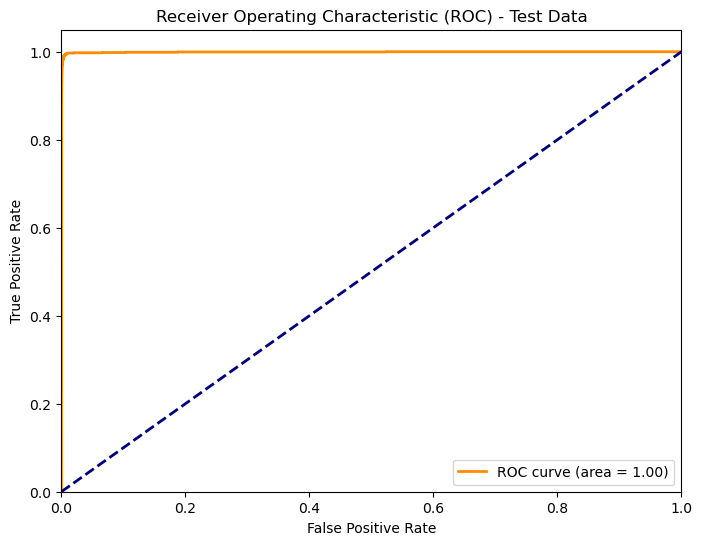

The AUC value for the testing data: 0.999


In [46]:
from sklearn.metrics import roc_curve, auc
Y_test_probabilities = xgb_pipeline.predict_proba(X_test_scaled)[:, 1]

# Calculate ROC curve from y_test and the probability predictions
fpr, tpr, _ = roc_curve(Y_test, Y_test_probabilities)

# Calculate AUC (Area under the ROC Curve )
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Random classifier line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Test Data')
plt.legend(loc="lower right")
plt.show()

auc_value_xgb = roc_auc_score(Y_test, Y_test_probabilities)

print(f'The AUC value for the testing data: {auc_value_xgb:.3f}')


In [47]:
print('Accuracy on lr smote Training data : ', lr_smote_training_data_accuracy)
print('Accuracy on lr smote Testing data : ', lr_smote_testing_accuracy)
print(f'The AUC value for the testing data: {auc_value_lr:.3f}')

print('Accuracy on dt smote Training data : ', dt_smote_training_data_accuracy)
print('Accuracy on dt smote Testing data : ', dt_smote_testing_accuracy)
print(f'The AUC value for the testing data: {auc_value_dt:.3f}')

print('Accuracy on rf smote Training data : ', rf_smote_training_data_accuracy)
print('Accuracy on rf smote Testing data : ', rf_smote_testing_accuracy)
print(f'The AUC value for the testing data: {auc_value_rf:.3f}')

print('Accuracy on xgb smote Training data : ', xgb_smote_training_data_accuracy)
print('Accuracy on xgb smote Testing data : ', xgb_smote_testing_accuracy)
print(f'The AUC value for the testing data: {auc_value_xgb:.3f}')


Accuracy on lr smote Training data :  0.9406136606756806
Accuracy on lr smote Testing data :  0.9684870383584121
The AUC value for the testing data: 0.983
Accuracy on dt smote Training data :  1.0
Accuracy on dt smote Testing data :  0.9991882274911907
The AUC value for the testing data: 0.965
Accuracy on rf smote Training data :  0.9999994098584329
Accuracy on rf smote Testing data :  0.9990349887310573
The AUC value for the testing data: 0.999
Accuracy on xgb smote Training data :  0.9968133338946236
Accuracy on xgb smote Testing data :  0.9946279991575797
The AUC value for the testing data: 0.999


### Undersampling:

In [48]:
#pipeline for Linear Regression
lr_pipeline = Pipeline([
#     ('scaler', StandardScaler()),
    ('classifier', LogisticRegression())
])
lr_pipeline.fit(X_train_scaled_undersampled, Y_train_undersampled)
X_train_prediction = lr_pipeline.predict(X_train_scaled_undersampled)
lr_undersampling_training_data_accuracy = accuracy_score(X_train_prediction, Y_train_undersampled)
print('Accuracy on Training data : ', lr_undersampling_training_data_accuracy)
X_test_prediction = lr_pipeline.predict(X_test_scaled_undersampled)
lr_undersampling_test_data_accuracy = accuracy_score(X_test_prediction, Y_test_undersampled)
print('Accuracy score on Test Data : ', lr_undersampling_test_data_accuracy)


Accuracy on Training data :  0.8904870624048706
Accuracy score on Test Data :  0.896835057821059


In [49]:
lr_undersampling_testing_data_classification_report = classification_report(X_test_prediction, Y_test_undersampled)
print('\nClassification Report on Testing data : \n', lr_undersampling_testing_data_classification_report)


Classification Report on Testing data : 
               precision    recall  f1-score   support

         0.0       0.97      0.84      0.90      1894
         1.0       0.82      0.97      0.89      1392

    accuracy                           0.90      3286
   macro avg       0.90      0.91      0.90      3286
weighted avg       0.91      0.90      0.90      3286



AUC Score on Test Data: 0.954


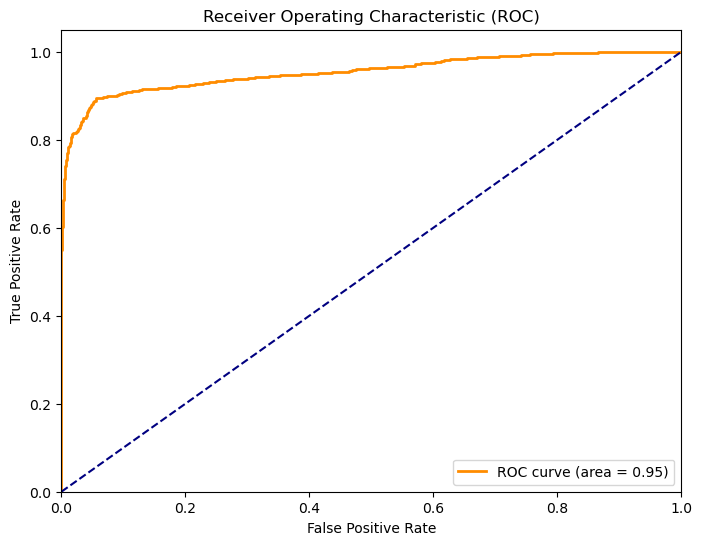

In [50]:
# Assuming your test set is correctly scaled and named `X_test_scaled_undersampled`
Y_test_probabilities = lr_pipeline.predict_proba(X_test_scaled_undersampled)[:, 1]
auc_score_lr = roc_auc_score(Y_test_undersampled, Y_test_probabilities)
print(f"AUC Score on Test Data: {auc_score_lr:.3f}")
fpr, tpr, thresholds = roc_curve(Y_test_undersampled, Y_test_probabilities)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {auc_score_lr:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


In [51]:
#pipeline for Decision Tree Classifier
dt_pipeline = Pipeline([
    ('classifier', DecisionTreeClassifier())
])

dt_pipeline.fit(X_train_scaled_undersampled, Y_train_undersampled)
X_train_prediction = dt_pipeline.predict(X_train_scaled_undersampled)
dt_undersampling_training_data_accuracy = accuracy_score(X_train_prediction, Y_train_undersampled)
print('Accuracy on Training data : ', dt_undersampling_training_data_accuracy)
X_test_prediction = dt_pipeline.predict(X_test_scaled_undersampled)
dt_undersampling_test_data_accuracy = accuracy_score(X_test_prediction, Y_test_undersampled)
print('Accuracy score on Test Data : ', dt_undersampling_test_data_accuracy)

Accuracy on Training data :  1.0
Accuracy score on Test Data :  0.9881314668289713


In [52]:
dt_undersampling_testing_data_classification_report = classification_report(X_test_prediction, Y_test_undersampled)
print('\nClassification Report on Testing data : \n', dt_undersampling_testing_data_classification_report)


Classification Report on Testing data : 
               precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      1642
         1.0       0.99      0.99      0.99      1644

    accuracy                           0.99      3286
   macro avg       0.99      0.99      0.99      3286
weighted avg       0.99      0.99      0.99      3286



AUC Score on Test Data: 0.988


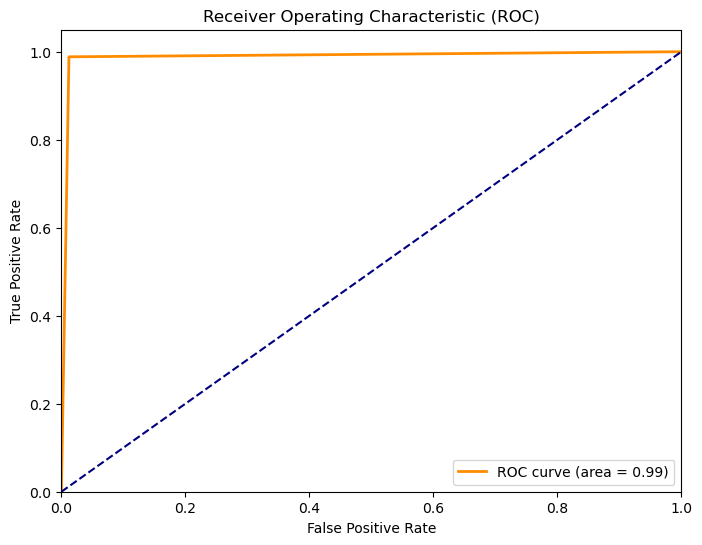

In [53]:
# Assuming your test set is correctly scaled and named `X_test_scaled_undersampled`
Y_test_probabilities = dt_pipeline.predict_proba(X_test_scaled_undersampled)[:, 1]
auc_score_dt = roc_auc_score(Y_test_undersampled, Y_test_probabilities)
print(f"AUC Score on Test Data: {auc_score_dt:.3f}")
fpr, tpr, thresholds = roc_curve(Y_test_undersampled, Y_test_probabilities)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {auc_score_dt:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


In [54]:
#pipeline for Random Forest Classifier
rf_pipeline = Pipeline([
    ('classifier', RandomForestClassifier())
])

rf_pipeline.fit(X_train_scaled_undersampled, Y_train_undersampled)
X_train_prediction = rf_pipeline.predict(X_train_scaled_undersampled)
rf_undersampling_training_data_accuracy = accuracy_score(X_train_prediction, Y_train_undersampled)
print('Accuracy on Training data : ', rf_undersampling_training_data_accuracy)
X_test_prediction = rf_pipeline.predict(X_test_scaled_undersampled)
rf_undersampling_test_data_accuracy = accuracy_score(X_test_prediction, Y_test_undersampled)
print('Accuracy score on Test Data : ', rf_undersampling_test_data_accuracy)

Accuracy on Training data :  1.0
Accuracy score on Test Data :  0.9872185027388922


In [55]:
# Apply 5-fold cross-validation
cv_scores = cross_val_score(rf_pipeline, X_train_scaled_undersampled, Y_train_undersampled, cv=5)

# Print the accuracy for each fold
print("Accuracy scores for each fold:")
print(cv_scores)

# Calculate the mean and standard deviation of the cross-validation scores
cv_mean = cv_scores.mean()
cv_std = cv_scores.std()
print(f'Mean cross-validation score: {cv_mean:.3f}')
print(f'Standard deviation of cross-validation scores: {cv_std:.3f}')


Accuracy scores for each fold:
[0.98972603 0.98820396 0.98592085 0.98515982 0.98630137]
Mean cross-validation score: 0.987
Standard deviation of cross-validation scores: 0.002


In [56]:
rf_undersampling_testing_data_classification_report = classification_report(X_test_prediction, Y_test_undersampled)
print('\nClassification Report on Testing data : \n', rf_undersampling_testing_data_classification_report)


Classification Report on Testing data : 
               precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      1623
         1.0       0.99      0.98      0.99      1663

    accuracy                           0.99      3286
   macro avg       0.99      0.99      0.99      3286
weighted avg       0.99      0.99      0.99      3286



AUC Score on Test Data: 0.998


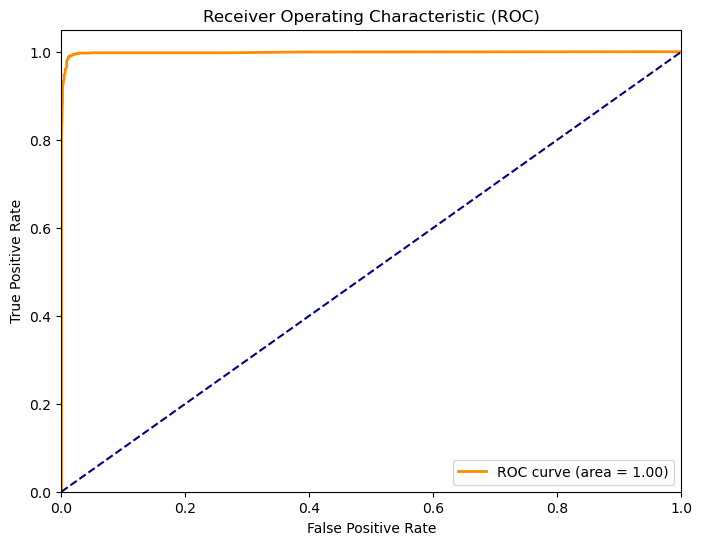

In [57]:
# Assuming your test set is correctly scaled and named `X_test_scaled_undersampled`
Y_test_probabilities = rf_pipeline.predict_proba(X_test_scaled_undersampled)[:, 1]
auc_score_rf = roc_auc_score(Y_test_undersampled, Y_test_probabilities)
print(f"AUC Score on Test Data: {auc_score_rf:.3f}")
fpr, tpr, thresholds = roc_curve(Y_test_undersampled, Y_test_probabilities)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {auc_score_rf:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


In [58]:
#pipeline for XGBoost
xgb_pipeline = Pipeline([
    ('classifier', xgb.XGBClassifier())
])

xgb_pipeline.fit(X_train_scaled_undersampled, Y_train_undersampled)
X_train_prediction = xgb_pipeline.predict(X_train_scaled_undersampled)
xgb_undersampling_training_data_accuracy = accuracy_score(X_train_prediction, Y_train_undersampled)
print('Accuracy on Training data : ', xgb_undersampling_training_data_accuracy)
X_test_prediction = xgb_pipeline.predict(X_test_scaled_undersampled)
xgb_undersampling_test_data_accuracy = accuracy_score(X_test_prediction, Y_test_undersampled)
print('Accuracy score on Test Data : ', xgb_undersampling_test_data_accuracy)

Accuracy on Training data :  0.9995433789954338
Accuracy score on Test Data :  0.9908703590992087


In [59]:
xgb_undersampling_testing_data_classification_report = classification_report(X_test_prediction, Y_test_undersampled)
print('\nClassification Report on Testing data : \n', xgb_undersampling_testing_data_classification_report)


Classification Report on Testing data : 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1629
           1       1.00      0.99      0.99      1657

    accuracy                           0.99      3286
   macro avg       0.99      0.99      0.99      3286
weighted avg       0.99      0.99      0.99      3286



AUC Score on Test Data: 0.998


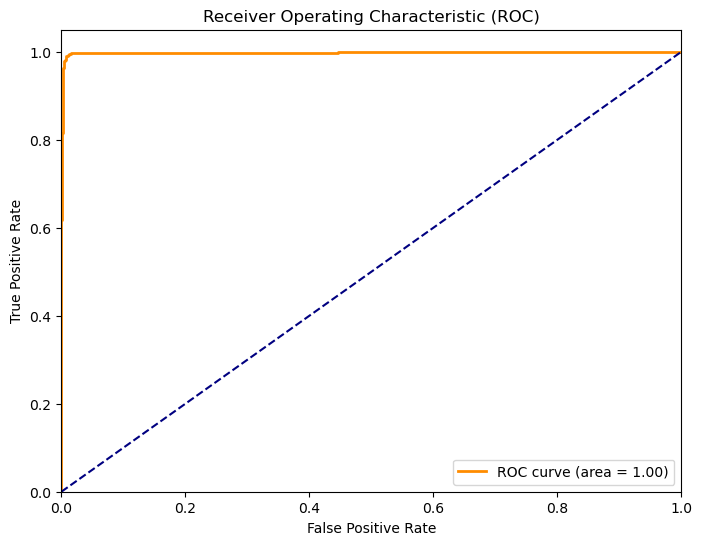

In [60]:
# Assuming your test set is correctly scaled and named `X_test_scaled_undersampled`
Y_test_probabilities = xgb_pipeline.predict_proba(X_test_scaled_undersampled)[:, 1]
auc_score_xgb = roc_auc_score(Y_test_undersampled, Y_test_probabilities)
print(f"AUC Score on Test Data: {auc_score_xgb:.3f}")
fpr, tpr, thresholds = roc_curve(Y_test_undersampled, Y_test_probabilities)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {auc_score_xgb:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


In [61]:
print('Accuracy on lr undersampling Training data : ', lr_undersampling_training_data_accuracy)
print('Accuracy on lr undersampling Testing data : ', lr_undersampling_test_data_accuracy)
print(f"AUC Score on Test Data: {auc_score_lr:.3f}")

print('Accuracy on dt undersampling Training data : ', dt_undersampling_training_data_accuracy)
print('Accuracy on dt undersampling Testing data : ', dt_undersampling_test_data_accuracy)
print(f"AUC Score on Test Data: {auc_score_dt:.3f}")

print('Accuracy on rf undersampling Training data : ', rf_undersampling_training_data_accuracy)
print('Accuracy on rf undersampling Testing data : ', rf_undersampling_test_data_accuracy)
print(f"AUC Score on Test Data: {auc_score_rf:.3f}")

print('Accuracy on xgb undersampling Training data : ', xgb_undersampling_training_data_accuracy)
print('Accuracy on xgb undersampling Testing data : ', xgb_undersampling_test_data_accuracy)
print(f"AUC Score on Test Data: {auc_score_xgb:.3f}")


Accuracy on lr undersampling Training data :  0.8904870624048706
Accuracy on lr undersampling Testing data :  0.896835057821059
AUC Score on Test Data: 0.954
Accuracy on dt undersampling Training data :  1.0
Accuracy on dt undersampling Testing data :  0.9881314668289713
AUC Score on Test Data: 0.988
Accuracy on rf undersampling Training data :  1.0
Accuracy on rf undersampling Testing data :  0.9872185027388922
AUC Score on Test Data: 0.998
Accuracy on xgb undersampling Training data :  0.9995433789954338
Accuracy on xgb undersampling Testing data :  0.9908703590992087
AUC Score on Test Data: 0.998


* General Performance: Models trained with SMOTE display improved accuracy scores, particularly in Logistic Regression and XGBoost, showcasing the technique's ability to elevate model performance across various algorithms.
* Mitigating Overfitting: Despite some concerns of overfitting with Decision Trees, SMOTE can effectively enhance model generalization when coupled with proper regularization techniques, which prevent the model from fitting to noise.
* Enhanced Discriminative Power: The elevated testing accuracy observed with SMOTE, particularly in Logistic Regression and XGBoost, points to its potential in boosting the discriminative capacity of models, even if this is sometimes not captured by the AUC metric alone.
* Conclusion: SMOTE stands out as a potent technique, especially when its ability to improve model accuracy is considered alongside strategies to mitigate overfitting. By synthetically boosting the representation of the minority class, SMOTE helps in achieving a more balanced and nuanced understanding of the data, which is critical for binary classification in imbalanced datasets. Its employment can, therefore, be recommended as a preferable approach, with the caveat that it should be paired with measures to control for model complexity.

In Conclusion,
* Random Forest (RF) with SMOTE appears to be the best model overall due to its exceptionally high AUC of 0.984 and very high accuracy on testing data. A high AUC value indicates better model performance across all classification thresholds, which is crucial for balanced performance in varied scenarios.
* Logistic Regression (LR) with SMOTE also stands out due to its robust AUC and good balance between training and testing accuracy. It may be preferred if a simpler, more interpretable model is required.

In summary, As priority is maximizing the ability to discriminate between classes and accuracy, the Random Forest with SMOTE is preferable. However, if you are also considering model simplicity and avoiding overfitting, Logistic Regression with SMOTE could be a better choice. As accuaracy and AUS score is very high for Random Forest am considering it.

In [64]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
param_grid = {
    'classifier__n_estimators': [10, 15],  # Reduced to two options
    'classifier__max_features': ['auto', 'sqrt'],  # Reduced to two options
    'classifier__max_depth': [None, 20],  # Simplified to two levels
    'classifier__min_samples_split': [2, 10]  # Edge values to see the effect of very different splits
}
grid_search = GridSearchCV(rf_pipeline, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train_scaled_smote, Y_train_smote)
print("Best parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

# Predict and evaluate on the training set
X_train_prediction = best_model.predict(X_train_scaled_smote)
rf_smote_training_data_accuracy = accuracy_score(Y_train_smote, X_train_prediction)
print('Accuracy on Training data : ', rf_smote_training_data_accuracy)

# Predict and evaluate on the testing set
X_test_predictions = best_model.predict(X_test_scaled)
rf_smote_testing_accuracy = accuracy_score(Y_test, X_test_predictions)
print('Accuracy on Testing data : ', rf_smote_testing_accuracy)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters: {'classifier__max_depth': None, 'classifier__max_features': 'sqrt', 'classifier__min_samples_split': 2, 'classifier__n_estimators': 15}
Accuracy on Training data :  0.9999846563192556
Accuracy on Testing data :  0.9989603339504796


In [65]:
import pickle
data = {"model": best_model}
with open('saved_steps.pkl', 'wb') as file:
    pickle.dump(data, file)